In [95]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [96]:
governance = pd.read_csv('Governance_Data_M2.csv')

In [97]:
governance.head(7)

,CC.EST,GE.EST,PV.EST,RL.EST,RL.NO.SRC,RQ.EST,VA.EST
0,-1.493361,-1.611539,-2.702721,-1.831407,10,-1.389163,-1.078267
1,-0.935061,-1.257485,-0.599918,-0.951059,10,-0.856853,-0.816006
2,0.632067,0.911797,1.503843,0.373448,1,0.930366,0.000000
3,-0.573539,-0.155121,0.088613,-0.378028,10,0.221967,0.086325
4,1.265454,1.749241,1.588675,1.615182,1,1.335421,1.085335
5,1.083614,1.285267,0.592605,0.875136,9,1.074331,-1.178066
6,-0.163570,-0.254262,-0.071997,-0.486266,13,-0.498344,0.584501


In [98]:
governance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CC.EST     211 non-null    float64
 1   GE.EST     211 non-null    float64
 2   PV.EST     211 non-null    float64
 3   RL.EST     211 non-null    float64
 4   RL.NO.SRC  211 non-null    int64  
 5   RQ.EST     211 non-null    float64
 6   VA.EST     211 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.7 KB


In [99]:
governance.shape

(211, 7)

In [100]:
governance.describe()

,CC.EST,GE.EST,PV.EST,RL.EST,RL.NO.SRC,RQ.EST,VA.EST
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,-0.003739,-0.004213,-0.004797,-0.005136,8.781991,-0.004109,-0.003265
std,0.996164,0.997153,0.999963,0.996052,3.583010,0.997991,0.988031
min,-1.936870,-2.362375,-2.711848,-2.331935,0.000000,-2.370466,-2.155002
25%,-0.770222,-0.720229,-0.597122,-0.713041,7.000000,-0.761328,-0.821545
50%,-0.122199,-0.079083,0.088613,-0.106093,10.000000,-0.024793,0.047348
75%,0.677260,0.710892,0.863447,0.672964,11.000000,0.779391,0.871508
max,2.236486,2.284203,1.910595,2.018592,14.000000,2.205299,1.720227


In [101]:
# Set the target, or the y variable

y = governance['GE.EST']

In [102]:
# Set the independent variable matrix, X

X = governance.drop('GE.EST', axis=1)

In [103]:
# create your train-test splits
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [104]:
# instantiate
# this creates a linear regression object that we can train and score
lr = LinearRegression()

In [105]:
# Train the model with the correct data set

lr.fit(X_train,y_train)

LinearRegression()

In [106]:
# use .score(). Recall this returns the default scoring method, which, for linear regression is r^2.

train_r2 = lr.score(X_train,y_train)
print(f'training r^2: {train_r2}')

training r^2: 0.9273740689835133


In [107]:
# Get predictions

y_train_pred = lr.predict(X_train)

In [108]:
# Use y_pred and y with the mean squared error method

train_mse = mean_squared_error(y_train, y_train_pred)
print(f'training MSE: {train_mse}')

training MSE: 0.06987685423698095


In [109]:
# use a better metric

train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_rmse


0.26434230504590245

Unseen data
Now that we have trained our model, lets see how it performs on unseen data.

In [111]:
# Score with test data

test_r2 = lr.score(X_test, y_test)
print(f'training r^2: {test_r2}')

training r^2: 0.9040217899769951


# Get the RMSE for the test set

y_test_pred = lr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'testing RMSE: {test_rmse}')

# As  reminder
print(f'training r^2: {train_r2}')
print(f'testing r^2: {test_r2}')

print(f'training RMSE: {train_rmse}')
print(f'testing RMSE: {test_rmse}')

TODO: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

In [115]:
# Train a simple linear regression model with only one feature for comparison
X_train_CCEST = X_train[['CC.EST']]
X_test_CCEST = X_test[['CC.EST']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_CCEST, y_train)

LinearRegression()

In [116]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_CCEST)
simple_predictions_test = simple_linear_model.predict(X_test_CCEST)

In [117]:
# Calculate the root mean squared error on the training and test set
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rmse_train)
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rmse_test)

0.3880314740098687
0.43354222383891344


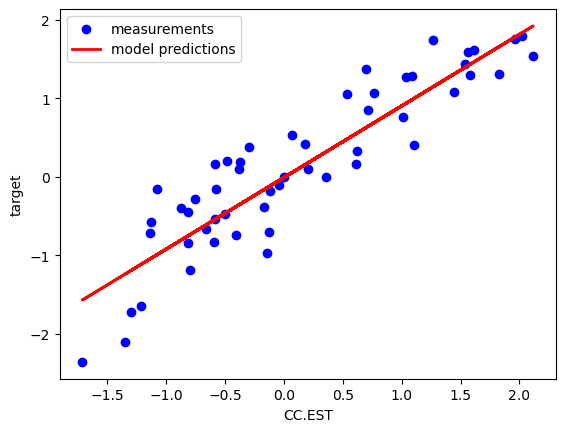

In [118]:
# Plot the simple linear regression model
plt.scatter(X_test_CCEST, y_test, color='blue', label='measurements')
plt.plot(X_test_CCEST, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("CC.EST")
plt.ylabel("target")
plt.legend(loc="upper left")
plt.show()